## Natural Language Processing

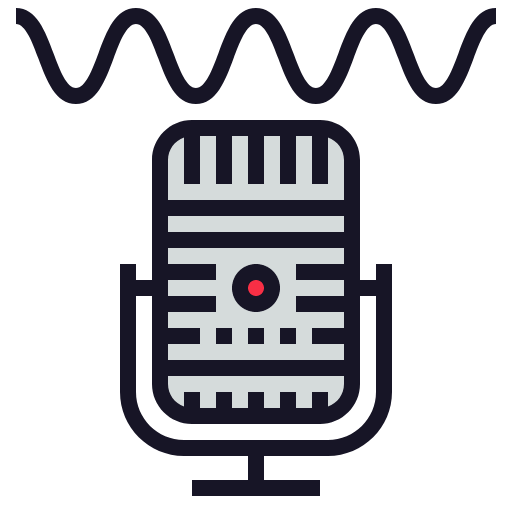

Natural Language Processing (NLP) is a type of computational linguistics that uses machine learning algorithms to understand how us people communicate. This includes voice assistance, chat bots, sentiment analysis and many more.

With NLP, computers can understand human speech in text and written form without the need of someone to structure their conversation in any way.


## What we'll be doing 

In this kernel, the main steps for any NLP problem will be described, as well as their lines of code. This will help further analysis and will be a good starting point to build more complex models.

In the dataset of this exercise we have 1000 reviews from a restaurant, labeled as **positive reviews (1) or negative ones (0).**

We will be building a model that may predict, given the words used in the review, a label for each of the reviews in the test set. 

**Sentiment analysis:**

Sentiment Analysis (also known as opinion mining or emotion AI) is a sub-field of NLP that tries to identify and extract opinions within a given text across blogs, reviews, social media, forums, news etc. Sentiment Analysis can help craft all this exponentially growing unstructured text into structured data using NLP and open source tools. This is what we are going to do here.

**Importing main ML and visualization libraries and modules**

In [1]:
# Principal ML and visualizations libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go

sns.set()

%matplotlib inline
%store -r wine_mask
%store -r Heart_mask

The datasets comes in a .tsv files, this means is a tab-separated values (TSV) file. As in text we usually have commas all over, different columns can be better separated with tabs. Read csv will work with this files, but we have to clarify the column delimiter. Quoting number refers to how the quotes inside the reviews are delimited (" "), this will ensure the algorithm ignores them.

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)
dataset.head()

Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

**We have 1000 reviews with their labels**

## Visualizations on the dataset

In [3]:
Labels = pd.DataFrame(dataset['Liked'].value_counts()).reset_index()
Labels.columns = ['Liked','Total']
Labels['Liked'] = Labels['Liked'].map({1: 'Positive', 0: 'Negative'})

fig = px.pie(Labels, values = 'Total', names = 'Liked', title='Percentage of reviews', hole=.4, color = 'Liked',
             width=800, height=400)
fig.show()

**Wordcloud**

Let's see the most used words in positive reviews!

In [4]:
positive = dataset[dataset["Liked"] == 1][["Review", "Liked"]]

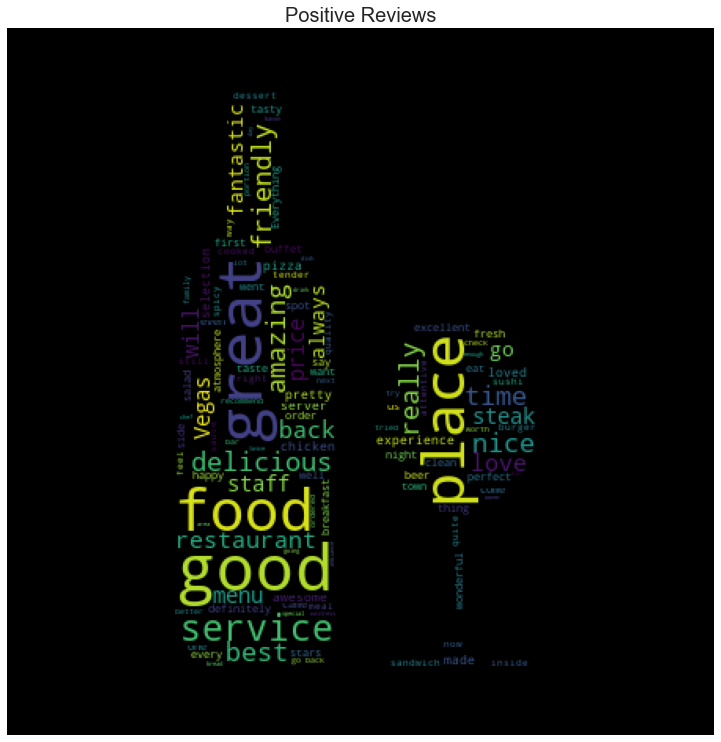

In [5]:
plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='black',max_words = 10000,
                          mask = wine_mask, 
                          width=1500, stopwords=STOPWORDS,
                          height=1080
                         ).generate(" ".join(positive.Review))
plt.title("Positive Reviews", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'viridis'))
plt.axis('off')
plt.show()

Now let's see what happens in the negative reviews

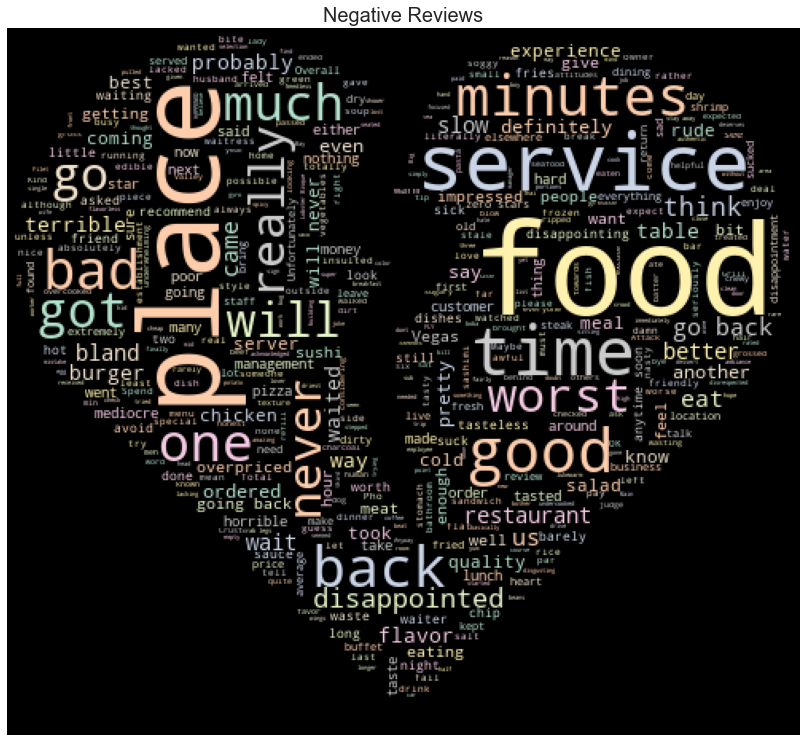

In [6]:
negative = dataset[dataset["Liked"] == 0][["Review", "Liked"]]

plt.subplots(figsize=(16,13))
wordcloud = WordCloud(
                          background_color='black',max_words = 1000,
                          mask = Heart_mask, 
                          width=1500, stopwords=STOPWORDS,
                          height=1080
                         ).generate(" ".join(negative.Review))
plt.title("Negative Reviews", fontsize=20)
plt.imshow(wordcloud.recolor( colormap= 'Pastel2'))
plt.axis('off')
plt.show()

## Data cleaning

As we are working with text, the data cleaning and preprocessing step are different as other algorithms like classification or regression supervised ones.

We'll be doing the processing steps for one review and then replicate it for all the reviews in the set.

In [7]:
# NLP libraries

import re # Regular expressions
import nltk # Natural language tool kit
from nltk.corpus import stopwords # This will help us get rid of useless words.

# Extra needed packages

nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Agust\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Agust\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Agust\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

First we'll be doing the process for only one review, and then generalize it to the whole set.

In [8]:
first_review = dataset['Review'][0]
first_review

'Wow... Loved this place.'

## Lowering case and cleaning non-characters.

I'll lowercase the sentence before starting the process, and get rid of any commas and any other non-character symbols. In this case I'll also get rid of numbers, keeping only words from a to z.

In [9]:
first_review = first_review.lower()
first_review = re.sub("[^a-zA-Z]", " ", first_review)
first_review

'wow    loved this place '

## Tokenization

Tokenization is the task of chopping the sentence up into pieces, called tokens. It’s a fundamental step in both traditional NLP methods like Count Vectorizer and Advanced Deep Learning-based architectures.

Tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization.

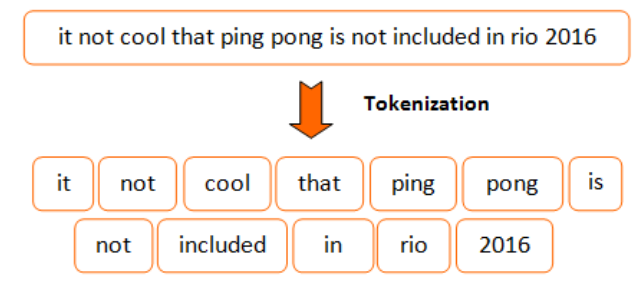

In [10]:
# Tokenization

first_review_list = nltk.word_tokenize(first_review)
first_review_list

['wow', 'loved', 'this', 'place']

## Stopwords

Stopwords are the words in any language which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence such as the, is, at, which, and on.

On removing stopwords, dataset size decreases, and the time to train the model also decreases without a huge impact on the accuracy of the model. Stopword removal can potentially help in improving performance.

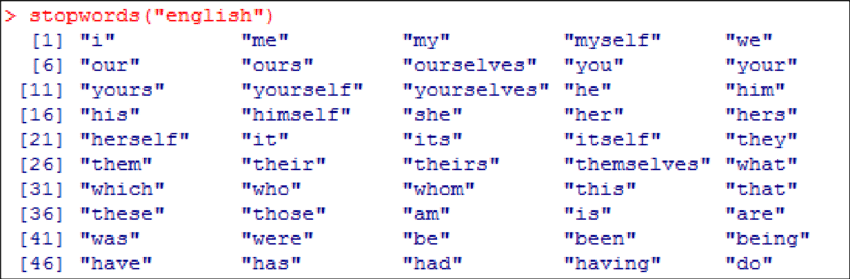

In [11]:
stopwords = nltk.corpus.stopwords.words('english')

first_review_list_cleaned = [word for word in first_review_list if word.lower() not in stopwords]
print(first_review_list_cleaned)

['wow', 'loved', 'place']


## Text Stemming / Lemmatization

Languages we speak and write are made up of several words often derived from one another. When a language contains words that are derived from another word as their use in the speech changes is called Inflected Language.

The degree of inflection may be higher or lower in a language.

**Stemming** is the process of reducing inflection in words to their root forms. This algorithm may result in words that are not actual words in the language. Stems are created by removing the suffixes or prefixes used with a word.

In [12]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmer.stem('lover'), stemmer.stem('cellphone')

('lover', 'cellphon')

In [13]:
for w in first_review_list_cleaned:
        print(stemmer.stem(w))

wow
love
place


**Lemmatization** unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. In general, lemmatization offers better precision than stemming. The con is that is slower than stemming

In [14]:
from nltk.stem import WordNetLemmatizer 

lemma = WordNetLemmatizer()
lemma.lemmatize('lover'), lemma.lemmatize('cellphone')

('lover', 'cellphone')

In [15]:
for w in first_review_list_cleaned:
        print(lemma.lemmatize(w))

wow
loved
place


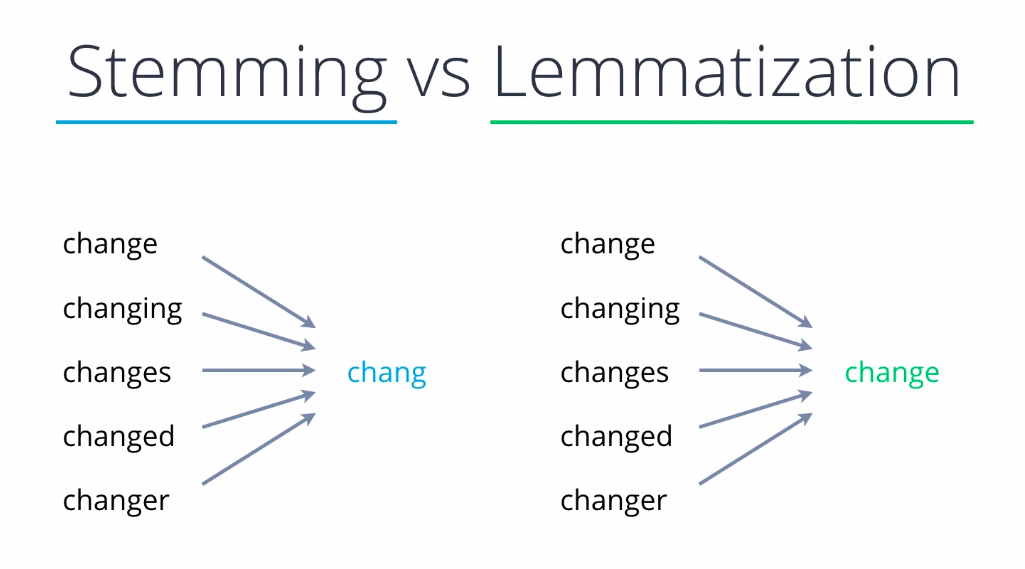

## Vectorizing

The ML moodel needs the text to be transformed before working with it, so now we will make numbers for it to understand.

**Bag of words** is a representation of text that describes the occurrence of words within a text. We need to have a vocabulary of known words and a way to measure the presence of these known words. Any information about the order or structure of words in the text is discarded. 

The model is only concerned with whether known words occur in the text. We will do this with CountVectorizer.

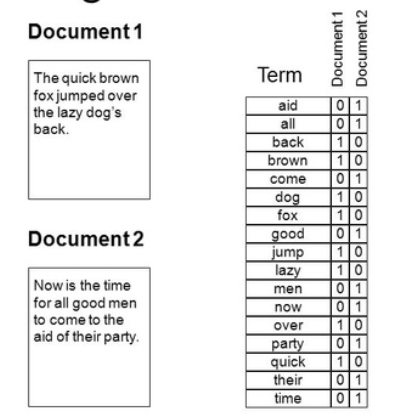

## Building the steps together

In [16]:
corpus=[]

for review in dataset['Review']:
    review = review.lower()
    review = re.sub("[^a-zA-Z]", " ", review)
    review = nltk.word_tokenize(review)
    review = [word for word in review if word.lower() not in stopwords]
    lemma = WordNetLemmatizer()
    review = [lemma.lemmatize(word) for word in review]
    review = " ".join(review) # Building again the dataframe
    corpus.append(review)
    
dataset["Review"] = corpus
dataset.head(5)

Review  Liked
0                                    wow loved place      1
1                                         crust good      0
2                                tasty texture nasty      0
3  stopped late may bank holiday rick steve recom...      1
4                         selection menu great price      1

## Bag of words

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
bag_of_words = cv.fit_transform(corpus).toarray()
bag_of_words

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Now that we have our sparsed matrix in which each row represents a review and each column a different word, we will have a 1 in a cell if that word is inside that review.

## Review labeling predictions!!

Now it's the time to predict the label for reviews! I'll try many different classifiers.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [19]:
y = dataset.iloc[:,1].values

X_train, X_test, y_train, y_test = train_test_split(bag_of_words, y, test_size = 0.20, random_state = 0)

In [20]:
def clf_model(model):
    clf = model
    clf.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, clf.predict(X_test).round())
    recall = recall_score(y_test, clf.predict(X_test).round())
    precision = precision_score(y_test, clf.predict(X_test).round())
    return clf, accuracy, recall, precision

In [21]:
model_performance = pd.DataFrame(columns = ["Model", "Accuracy", "Recall", "Precision"])

models_to_evaluate = [DecisionTreeClassifier(), LogisticRegression(), RandomForestClassifier(n_estimators=1000),
                      KNeighborsClassifier(n_neighbors = 7, metric = "minkowski", p = 2),
                      SVC(kernel = 'rbf'), GaussianNB(), XGBClassifier(n_estimators=300, learning_rate=0.01)]

for model in models_to_evaluate:
    clf, accuracy, recall, precision = clf_model(model)
    model_performance = model_performance.append({"Model": model, "Accuracy": accuracy,
                                                  "Recall": recall, "Precision": precision}, ignore_index=True)

model_performance

Model  Accuracy    Recall  \
0                           DecisionTreeClassifier()     0.660  0.592233   
1                               LogisticRegression()     0.725  0.669903   
2  (DecisionTreeClassifier(max_features='auto', r...     0.685  0.504854   
3                KNeighborsClassifier(n_neighbors=7)     0.610  0.475728   
4                                              SVC()     0.720  0.543689   
5                                       GaussianNB()     0.690  0.873786   
6  XGBClassifier(learning_rate=0.01, n_estimators...     0.690  0.436893   

   Precision  
0   0.701149  
1   0.766667  
2   0.812500  
3   0.671233  
4   0.861538  
5   0.647482  
6   0.918367

We tried different classifiers to see which one performs better. In this case we would keep logistic regression or Supported Vector Classifier.

## Checking out the classification model with custom reviews

In [22]:
my_reviews = {'Review': ["I highly recommend the restaurant.","I will never go back!!", 
                        "Disgusting food and poor service.","Lovely evening and delicious dessert."]}
my_reviewsDF = pd.DataFrame.from_dict(my_reviews)
my_reviewsDF

Review
0     I highly recommend the restaurant.
1                 I will never go back!!
2      Disgusting food and poor service.
3  Lovely evening and delicious dessert.

In [23]:
corpus=[]

for review in my_reviewsDF['Review']:
    review = review.lower()
    review = re.sub("[^a-zA-Z]", " ", review)
    review = nltk.word_tokenize(review)
    review = [word for word in review if word.lower() not in stopwords]
    lemma = WordNetLemmatizer()
    review = [lemma.lemmatize(word) for word in review]
    review = " ".join(review) # Building again the dataframe
    corpus.append(review)
    
my_reviewsDF["Review"] = corpus

bag_of_words = cv.transform(corpus).toarray() # Using the same CV as before!!

In [24]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

Label = LR.predict(bag_of_words)

Label = pd.DataFrame({'Label':Label})
joined = my_reviewsDF.join(Label)
joined

Review  Label
0       highly recommend restaurant      1
1                     never go back      0
2      disgusting food poor service      0
3  lovely evening delicious dessert      1

## Unigrams, bigrams and trigrams

The frequencies of the various possible n-grams are characteristic of languages. Studying them will help us know with combinations of words or expressions are more commonly used for positive and negative reviews.

In [25]:
def unigram(corpus, n=None):
    cv = CountVectorizer().fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def bigram(corpus, n=None):
    cv = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def trigram(corpus, n=None):
    cv = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

## Positive reviews

In [26]:
positive = dataset[dataset["Liked"] == 1][["Review", "Liked"]]

In [27]:
pos_uni = unigram(positive['Review'], 20)
temp = pd.DataFrame(pos_uni, columns = ['words' ,'count'])
fig = px.bar(temp, x = 'words', y = 'count', color = 'words', title='Top 20 unigrams in positive reviews')        
fig.show()

In [28]:
pos_bi = bigram(positive['Review'], 20)
temp = pd.DataFrame(pos_bi, columns = ['words' ,'count'])
fig = px.bar(temp, x = 'words', y = 'count', color = 'words', title='Top 20 bigrams in positive reviews')        
fig.show()

In [29]:
pos_tri = trigram(positive['Review'], 20)
temp = pd.DataFrame(pos_tri, columns = ['words' ,'count'])
fig = px.bar(temp, x = 'words', y = 'count', color = 'words', title='Top 20 trigrams in positive reviews')        
fig.show()

## Negative reviews

In [30]:
negative = dataset[dataset["Liked"] == 0][["Review", "Liked"]]
neg_uni = unigram(negative['Review'], 20)
temp = pd.DataFrame(neg_uni, columns = ['words' ,'count'])

In [31]:
fig = go.Figure(data =[go.Bar(x = temp['words'].tolist(), y= temp['count'].tolist())])
fig.update_traces(marker_color='rgb(0,0,139)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Top 20 unigrams in negative reviews')
fig.show()

In [32]:
neg_bi = bigram(negative['Review'], 20)
temp = pd.DataFrame(neg_bi, columns = ['words' ,'count'])

fig = go.Figure(data =[go.Bar(x = temp['words'].tolist(), y= temp['count'].tolist())])
fig.update_traces(marker_color='rgb(0,0,139)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Top 20 bigrams in negative reviews')
fig.show()

In [33]:
neg_tri = trigram(negative['Review'], 20)
temp = pd.DataFrame(neg_tri, columns = ['words' ,'count'])

fig = go.Figure(data =[go.Bar(x = temp['words'].tolist(), y= temp['count'].tolist())])
fig.update_traces(marker_color='rgb(0,0,139)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Top 20 trigrams in negative reviews')
fig.show()

## Sentiment analysis with NRCLex

From https://pypi.org/project/NRCLex/: 

NRCLex will measure emotional affect from a body of text. Affect dictionary contains approximately 27,000 words, and is based on the National Research Council Canada (NRC) affect lexicon.

Emotional affects measured include the following: fear, anger, anticipation, trust, surprise, positive, negative, sadness, disgust, joy.

## Emotions on reviews

In [34]:
from nrclex import NRCLex

In [35]:
text_object = NRCLex(' '.join(dataset['Review']))

EmotionDF = pd.DataFrame.from_dict(text_object.affect_frequencies, orient='index').sort_values(by=0, ascending=False).reset_index()
EmotionDF.columns = ['Emotion', 'Frequency']

In [36]:
fig = px.pie(EmotionDF, values = 'Frequency', names='Emotion',
             title='Emotion Frequency',
             hover_data=['Emotion'], labels={'Emotion':'Emotion'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()